In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import torch
import torchvision


In [31]:
# path to a image: tsb/basedata/training/bad-image/2.jpg
img = image.load_img('custom-ava-downloader/Training/training_bad_image/2.jpg')
# save the image to the current directory
img.save('2.jpg')

In [32]:

cv2.imread('2.jpg')

array([[[71, 73, 83],
        [72, 74, 84],
        [74, 76, 86],
        ...,
        [ 5,  7,  8],
        [ 6,  8,  9],
        [ 7,  9, 10]],

       [[77, 79, 89],
        [78, 80, 90],
        [78, 80, 90],
        ...,
        [ 6,  8,  9],
        [ 7,  9, 10],
        [ 8, 10, 11]],

       [[80, 82, 92],
        [80, 82, 92],
        [80, 82, 92],
        ...,
        [ 8, 10, 11],
        [ 8, 10, 11],
        [ 9, 11, 12]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [33]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [34]:
# every pictures have an assigned value
train_dataset = train.flow_from_directory('custom-ava-downloader/Training',
                                            target_size=(200,200),
                                            batch_size= 64,
                                            class_mode='binary')

validation_dataset = train.flow_from_directory('custom-ava-downloader/Validating',
                                            target_size=(200,200),
                                            batch_size=64,
                                            class_mode='binary')
                                            

Found 1189 images belonging to 2 classes.
Found 1165 images belonging to 2 classes.


In [35]:
train_dataset.class_indices # {'bad-image': 0, 'good-image': 1}

{'training_bad_image': 0, 'training_good_image': 1}

In [36]:
# create a model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)), # 16 filters, 3x3 matrix
                                    tf.keras.layers.MaxPooling2D(2,2), # 2x2 matrix
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), # 32 filters, 3x3 matrix
                                    tf.keras.layers.MaxPooling2D(2,2), # 2x2 matrix
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # 64 filters, 3x3 matrix
                                    tf.keras.layers.MaxPooling2D(2,2), # 2x2 matrix
                                    tf.keras.layers.Flatten(), # flatten the image
                                    tf.keras.layers.Dense(512, activation='relu'), # 512 neurons
                                    tf.keras.layers.Dense(1, activation='sigmoid')]) # 1 neuron

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 64)      

In [37]:
# compile the model
model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(lr=0.001),
                metrics=['accuracy'])

Epoch 1/10
19/19 [==============================] - 56s 3s/step - loss: 1.4387 - accuracy: 0.6358 - val_loss: 0.6564 - val_accuracy: 0.6695
Epoch 2/10
19/19 [==============================] - 57s 3s/step - loss: 0.6256 - accuracy: 0.6770 - val_loss: 0.6387 - val_accuracy: 0.6695
Epoch 3/10
19/19 [==============================] - 61s 3s/step - loss: 0.6143 - accuracy: 0.6905 - val_loss: 0.6459 - val_accuracy: 0.6670
Epoch 4/10
19/19 [==============================] - 61s 3s/step - loss: 0.6468 - accuracy: 0.7082 - val_loss: 0.6457 - val_accuracy: 0.6575
Epoch 5/10
19/19 [==============================] - 55s 3s/step - loss: 0.5674 - accuracy: 0.7359 - val_loss: 0.6441 - val_accuracy: 0.6609
Epoch 6/10
19/19 [==============================] - 57s 3s/step - loss: 0.4928 - accuracy: 0.8015 - val_loss: 0.7604 - val_accuracy: 0.6515
Epoch 7/10
19/19 [==============================] - 51s 3s/step - loss: 0.4565 - accuracy: 0.7965 - val_loss: 1.0684 - val_accuracy: 0.6661
Epoch 8/10
19/19 [==

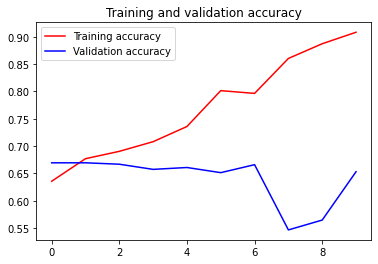

<Figure size 432x288 with 0 Axes>

In [38]:
# train the model
history = model.fit(train_dataset,
                    steps_per_epoch=19, 
                    epochs=10,
                    validation_data=validation_dataset)

# plot the accuracy and loss into a graph
acc = history.history['accuracy'] # accuracy
val_acc = history.history['val_accuracy'] # validation accuracy
loss = history.history['loss'] # loss
val_loss = history.history['val_loss'] # validation loss

# note: to increase the accuracy, we can 
# 1. get more data
# 2. add more layers 
# 3. change image size, not too small or too large
# 4. increase the number of epochs

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

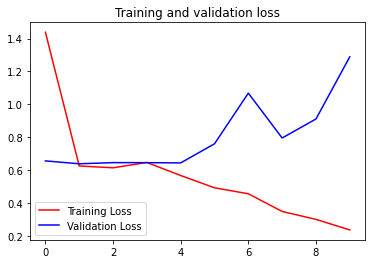

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

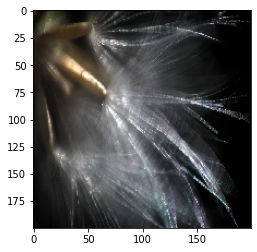

1.jpg is a bad image with a prediction result of 0.0


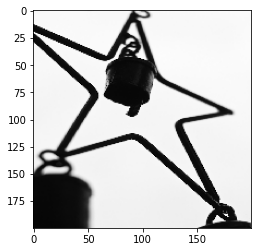

105.jpg is a good image with a prediction result of 1.0


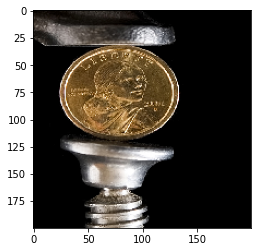

1056.jpg is a bad image with a prediction result of 0.0


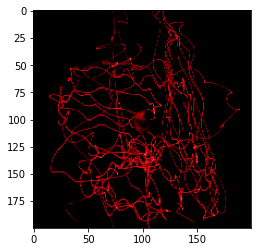

1158.jpg is a bad image with a prediction result of 0.0


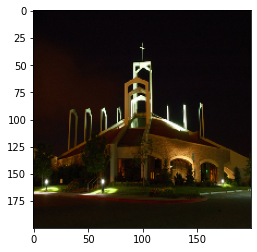

1263.jpg is a good image with a prediction result of 1.0


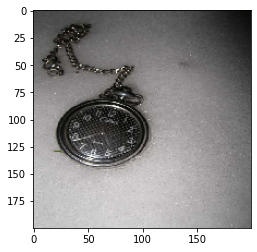

1368.jpg is a bad image with a prediction result of 2.5842167e-27


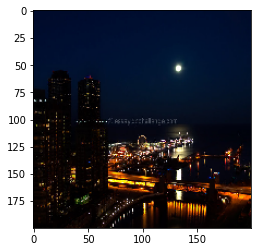

1470.jpg is a bad image with a prediction result of 0.0


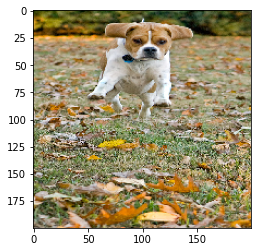

1571.jpg is a bad image with a prediction result of 0.0


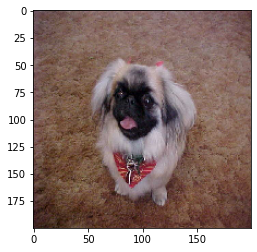

1674.jpg is a bad image with a prediction result of 0.0


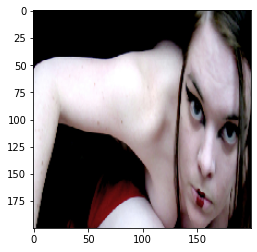

1778.jpg is a bad image with a prediction result of 0.0


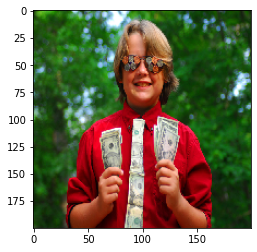

1911.jpg is a bad image with a prediction result of 0.0


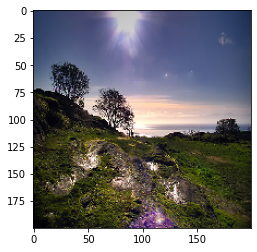

2020.jpg is a good image with a prediction result of 1.0


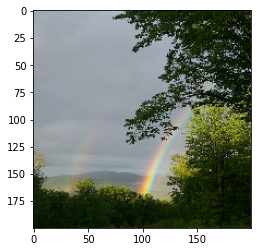

2135.jpg is a bad image with a prediction result of 0.0


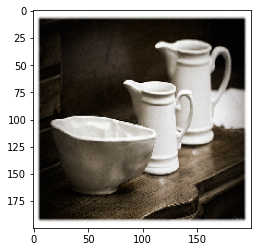

214.jpg is a good image with a prediction result of 1.0


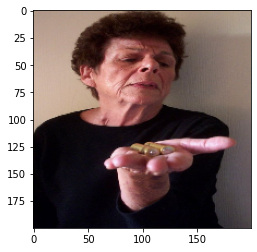

2240.jpg is a bad image with a prediction result of 0.0


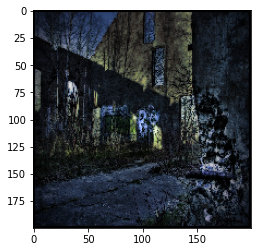

2348.jpg is a bad image with a prediction result of 0.0


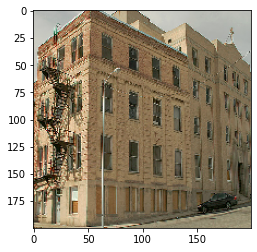

2453.jpg is a bad image with a prediction result of 0.0


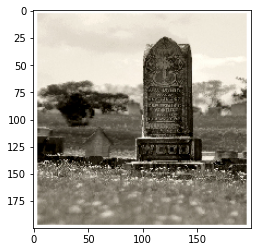

317.jpg is a bad image with a prediction result of 0.0


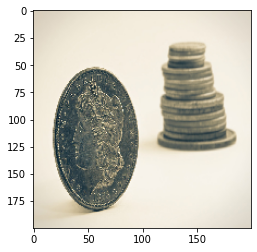

418.jpg is a bad image with a prediction result of 0.0


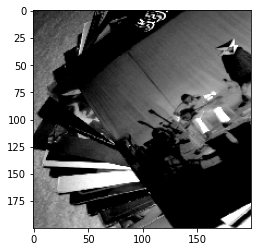

525.jpg is a bad image with a prediction result of 0.0


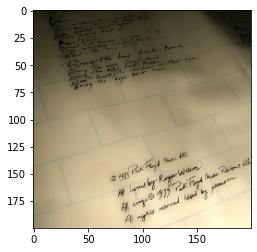

636.jpg is a bad image with a prediction result of 0.0


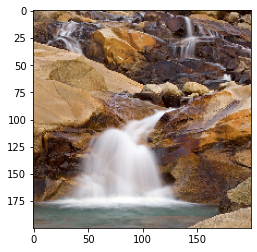

739.jpg is a bad image with a prediction result of 0.0


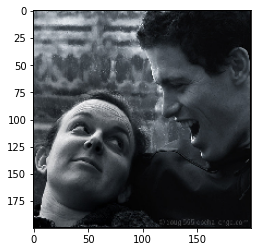

842.jpg is a bad image with a prediction result of 0.0


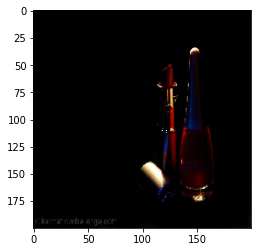

948.jpg is a bad image with a prediction result of 0.0


In [40]:
# predict the image in the custom-ava-downloader/validation_image folder with the model
# print the prediction result
# if the prediction result is 1, then the image is a good image
# if the prediction result is 0, then the image is a bad image
import numpy as np
import json
from keras.preprocessing import image

# read JSON file, for comparsion later on with prediction result
with open('/mnt/c/Users/joe19/Desktop/EECS441/custom-ava-downloader/image_data.json') as json_file:
    data = json.load(json_file)

# loop through the images in the custom-ava-downloader/validation_image folder and predict the image
for image_name in os.listdir('custom-ava-downloader/Testing'):

    # resize this image 
    test_image = image.load_img('custom-ava-downloader/Testing/' + image_name, target_size = (200, 200))

    # print the image 
    plt.imshow(test_image)
    plt.show()

    # convert the image to an array
    test_image = image.img_to_array(test_image)

    # expand the dimension of the image
    test_image = np.expand_dims(test_image, axis = 0)

    # predict the image
    result = model.predict(test_image)
    if result[0][0] == 1:
        prediction = 'good image'
    else:
        prediction = 'bad image'
    print(image_name + " is a " + prediction + " with a prediction result of " + str(result[0][0]))